<a href="https://colab.research.google.com/github/shawmica/HandGesture/blob/main/07_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import files
uploaded = files.upload()


Saving data1.xlsx to data1 (2).xlsx


In [55]:
import pandas as pd

# Load data with the correct header row (usually second row if first is blank)
df = pd.read_excel("data1.xlsx", header=1)

# View first few rows
df.head()



,Unnamed: 0,Subject name,Num of Cridits,Study hours,impact of assignment marks in final exam,Assignment/Quiz Score - 1 (out of 10),Assignment/Quiz Score -2 (put assignment marks out of 10) (e.g 8),Mid Semester Exam Marks (Optional),Attendance Percentage (e.g 85),Final Exam Grade,Engagement During Lectures,Number of Missed Deadlines
0,priyakuga2002@gmail.com,NaN,4,15.0,0.3,6,8.0,30.0,80.0,B-,5,0
1,priyakuga2002@gmail.com,NaN,2,15.0,0.3,7,7.0,10.0,80.0,B+,5,0
2,banukaabeysinghe10@gmail.com,NaN,4,12.0,0.4,8,8.0,NaN,81.0,B+,4,2
3,banukaabeysinghe10@gmail.com,NaN,3,12.0,0.4,8,8.0,NaN,82.0,B,4,3
4,kajeepanakajee25@gmail.com,NaN,4,20.0,0.2,9,9.0,85.0,80.0,B+,2,2


In [56]:
# Rename columns to short and readable names
df.columns = [
    "Email",               # Original unnamed column with email
    "Subject",             # Subject name (if it exists)
    "Credits",             # Num of Cridits
    "StudyHours",          # Study hours
    "AssignmentImpact",    # impact of assignment marks in final exam
    "Quiz1",               # Assignment/Quiz Score - 1 (out of 10)
    "Quiz2",               # Assignment/Quiz Score - 2 (out of 10)
    "MidExam",             # Mid Semester Exam Marks (Optional)
    "Attendance",          # Attendance Percentage (e.g 85)
    "FinalGrade",          # Final Exam Grade
    "Engagement",          # Engagement During Lectures
    "MissedDeadlines"      # Number of Missed Deadlines
]
print("Renamed Columns:")
print(df.columns.tolist())
# Clean up column names: remove leading/trailing spaces
df.columns = df.columns.str.strip()



Renamed Columns:
['Email', 'Subject', 'Credits', 'StudyHours', 'AssignmentImpact', 'Quiz1', 'Quiz2', 'MidExam', 'Attendance', 'FinalGrade', 'Engagement', 'MissedDeadlines']


In [57]:
df.drop(columns=["Subject", "Email"], inplace=True)
print(df.columns.tolist())




['Credits', 'StudyHours', 'AssignmentImpact', 'Quiz1', 'Quiz2', 'MidExam', 'Attendance', 'FinalGrade', 'Engagement', 'MissedDeadlines']


In [58]:
has_missing = df.isnull().values.any()
print("Any missing (NaN) values in the dataset?:", has_missing)


Any missing (NaN) values in the dataset?: True


In [59]:
print(df.isnull().sum())


Credits               0
StudyHours            0
AssignmentImpact      0
Quiz1                 0
Quiz2                 0
MidExam             225
Attendance            0
FinalGrade            0
Engagement            0
MissedDeadlines       0
dtype: int64


In [60]:
df.drop(columns=["MidExam"], inplace=True)
print(df.columns.tolist())


['Credits', 'StudyHours', 'AssignmentImpact', 'Quiz1', 'Quiz2', 'Attendance', 'FinalGrade', 'Engagement', 'MissedDeadlines']


Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Initialize encoder
le = LabelEncoder()

# Step 2: Fit and transform FinalGrade
df["FinalGradeEncoded"] = le.fit_transform(df["FinalGrade"])

# Step 3 (optional): Drop original FinalGrade column
df.drop(columns=["FinalGrade"], inplace=True)

# Step 4 (optional): See label mapping
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label mapping: {'A': np.int64(0), 'A+': np.int64(1), 'A-': np.int64(2), 'B': np.int64(3), 'B+': np.int64(4), 'B-': np.int64(5), 'C': np.int64(6), 'C+': np.int64(7), 'C-': np.int64(8), 'D': np.int64(9), 'D+': np.int64(10), 'E': np.int64(11)}


In [62]:
correlation = df[["Engagement", "FinalGradeEncoded"]].corr()
print("Correlation Matrix:\n")
print(correlation)

Correlation Matrix:

                   Engagement  FinalGradeEncoded
Engagement           1.000000          -0.261848
FinalGradeEncoded   -0.261848           1.000000


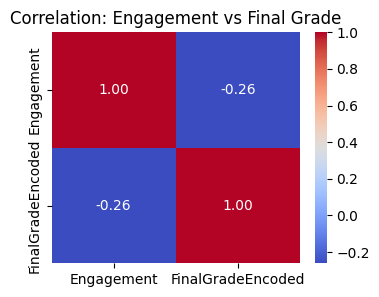

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Engagement vs Final Grade")
plt.show()


In [64]:
import numpy as np
from scipy.stats import zscore

# Define the raw numeric columns before normalization
raw_columns = ['Credits', 'StudyHours', 'AssignmentImpact', 'Quiz1', 'Quiz2', 'Attendance', 'MissedDeadlines']

# Ensure numeric conversion (if needed)
for col in raw_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 1: Compute Z-scores for raw columns
z_scores = df[raw_columns].apply(zscore)

# Step 2: Identify outliers (Z-score > 3 or < -3)
outlier_mask = (z_scores.abs() > 3)

# Step 3: Print number of outliers per column
print("Outlier counts per column (Z-score > 3 or < -3):")
print(outlier_mask.sum())

# Step 4: Optional – Show rows with any outlier (for inspection only)
rows_with_outliers = df[outlier_mask.any(axis=1)]
print(f"\nTotal rows with at least one outlier: {rows_with_outliers.shape[0]}")


Outlier counts per column (Z-score > 3 or < -3):
Credits              0
StudyHours          11
AssignmentImpact     0
Quiz1                3
Quiz2                5
Attendance           0
MissedDeadlines     14
dtype: int64

Total rows with at least one outlier: 29


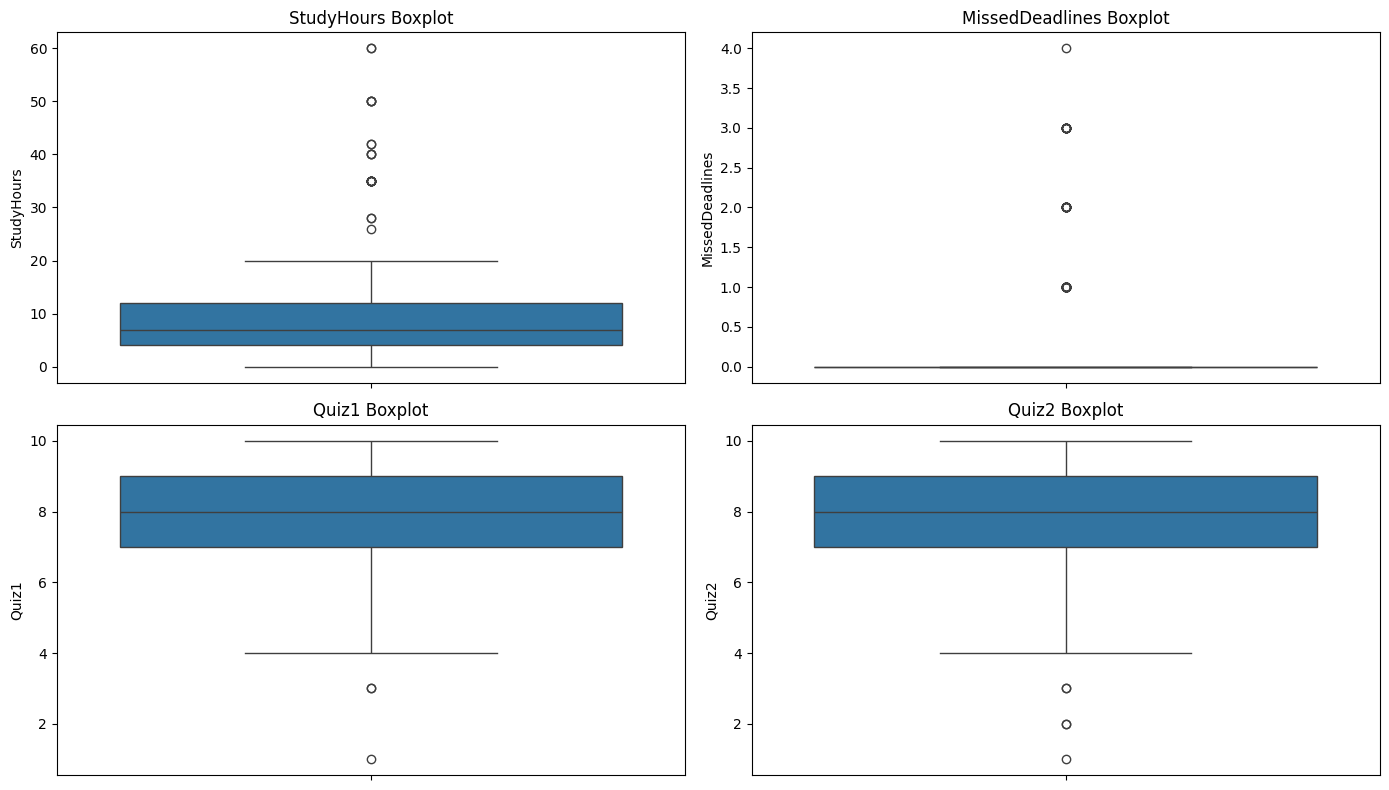

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_check = ['StudyHours', 'MissedDeadlines', 'Quiz1', 'Quiz2']

plt.figure(figsize=(14, 8))
for i, col in enumerate(columns_to_check):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()


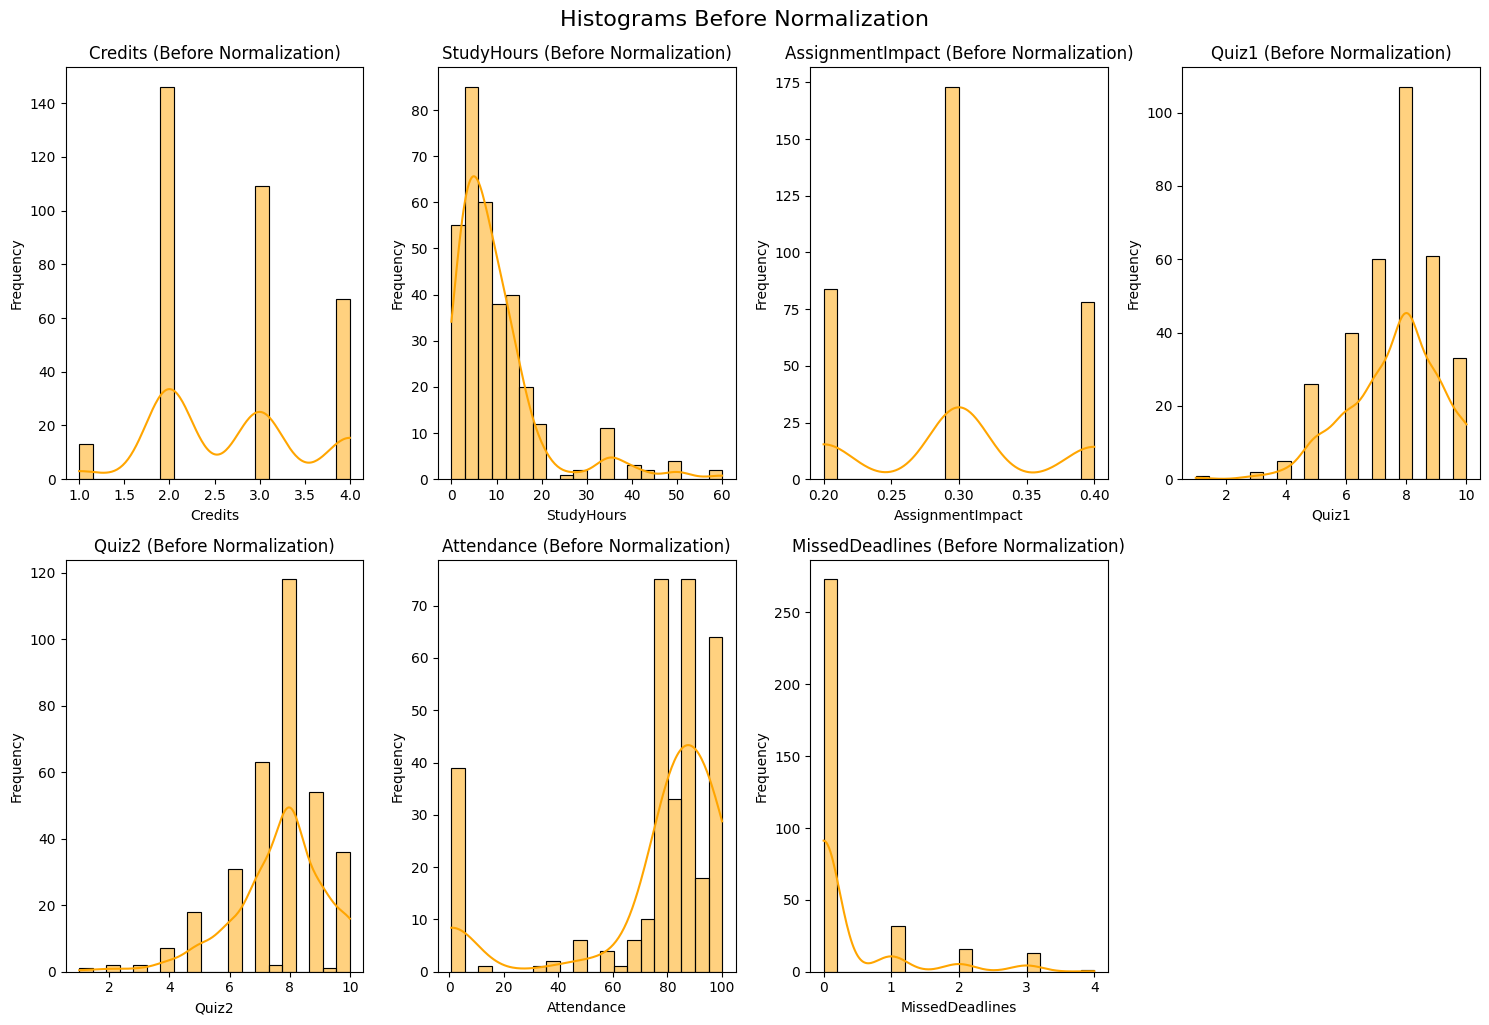

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns if not already defined
normalized_columns = ['Credits', 'StudyHours', 'AssignmentImpact', 'Quiz1', 'Quiz2', 'Attendance', 'MissedDeadlines']

# Plot histograms BEFORE normalization
plt.figure(figsize=(15, 10))

for i, col in enumerate(normalized_columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color='orange')
    plt.title(f'{col} (Before Normalization)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle("Histograms Before Normalization", fontsize=16, y=1.02)
plt.show()


In [67]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
normalized_columns = ['Credits', 'StudyHours', 'AssignmentImpact', 'Quiz1', 'Quiz2', 'Attendance', 'MissedDeadlines']

# Optional: ensure columns are numeric
df.columns = df.columns.str.strip()  # Strip whitespace to prevent KeyError

for col in normalized_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f" Column '{col}' not found in DataFrame.")

# Apply Min-Max normalization
scaler = MinMaxScaler()
df[normalized_columns] = scaler.fit_transform(df[normalized_columns])


print(" Normalization applied to:", normalized_columns)
print("\n Normalized values (first 5 rows):")
print(df[normalized_columns].head())


 Normalization applied to: ['Credits', 'StudyHours', 'AssignmentImpact', 'Quiz1', 'Quiz2', 'Attendance', 'MissedDeadlines']

 Normalized values (first 5 rows):
    Credits  StudyHours  AssignmentImpact     Quiz1     Quiz2  Attendance  \
0  1.000000    0.250000               0.5  0.555556  0.777778    0.798387   
1  0.333333    0.250000               0.5  0.666667  0.666667    0.798387   
2  1.000000    0.200000               1.0  0.777778  0.777778    0.808468   
3  0.666667    0.200000               1.0  0.777778  0.777778    0.818548   
4  1.000000    0.333333               0.0  0.888889  0.888889    0.798387   

   MissedDeadlines  
0             0.00  
1             0.00  
2             0.50  
3             0.75  
4             0.50  


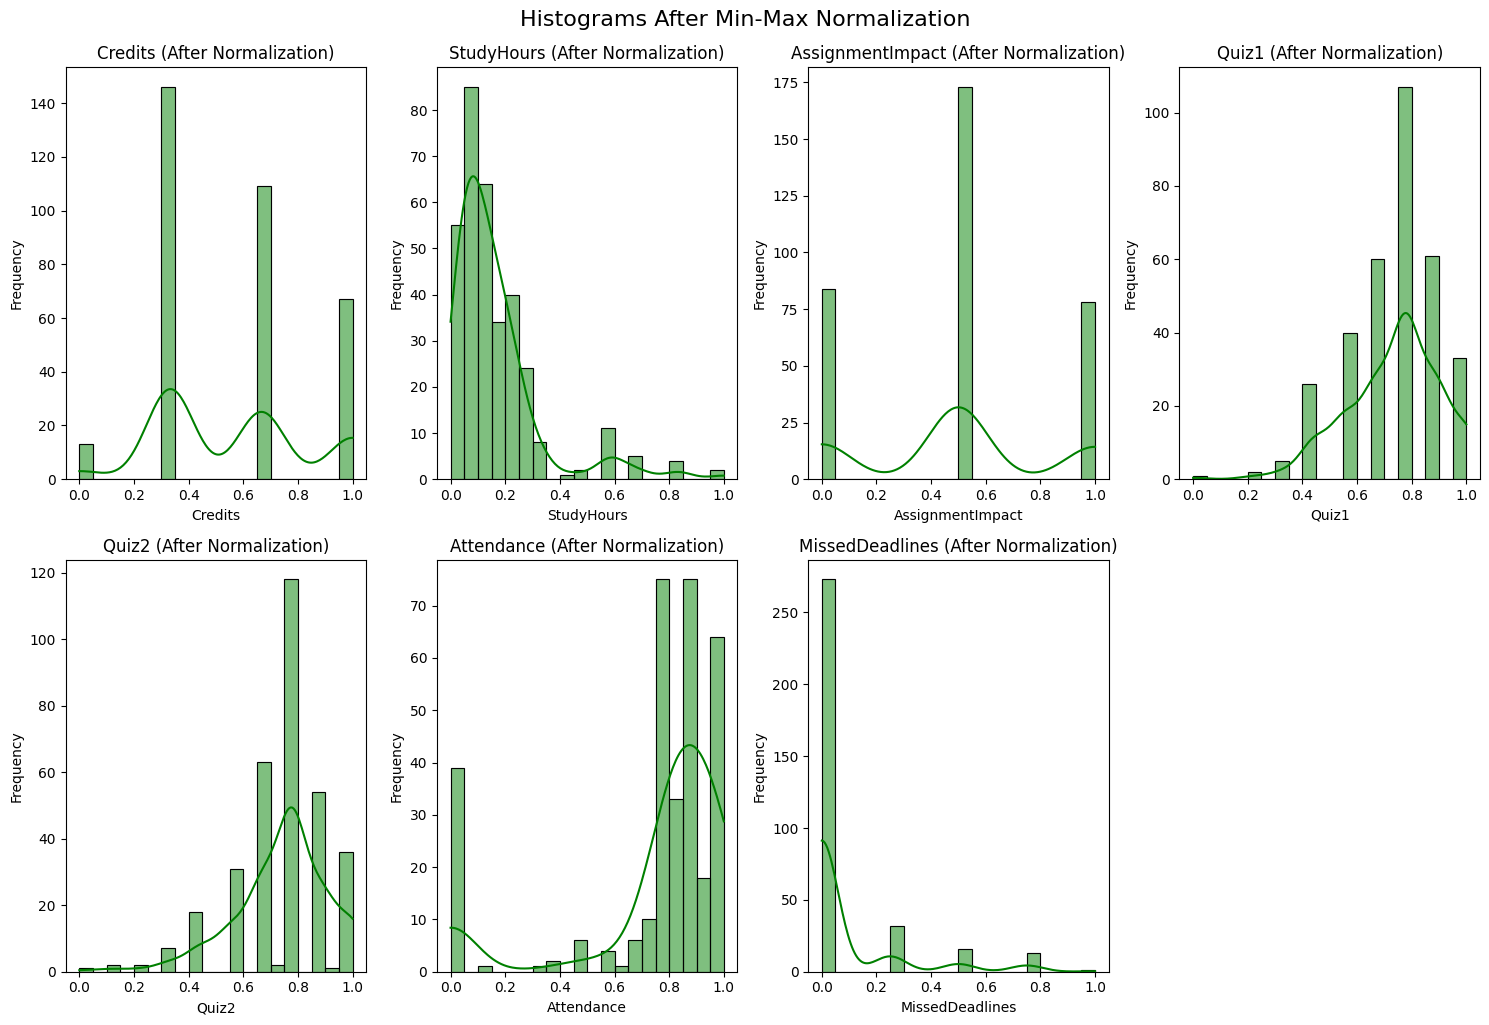

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms AFTER Min-Max normalization
plt.figure(figsize=(15, 10))

for i, col in enumerate(normalized_columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color='green')
    plt.title(f'{col} (After Normalization)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle("Histograms After Min-Max Normalization", fontsize=16, y=1.02)
plt.show()


Random Forest Calculates Predictive Power (Feature Importance)

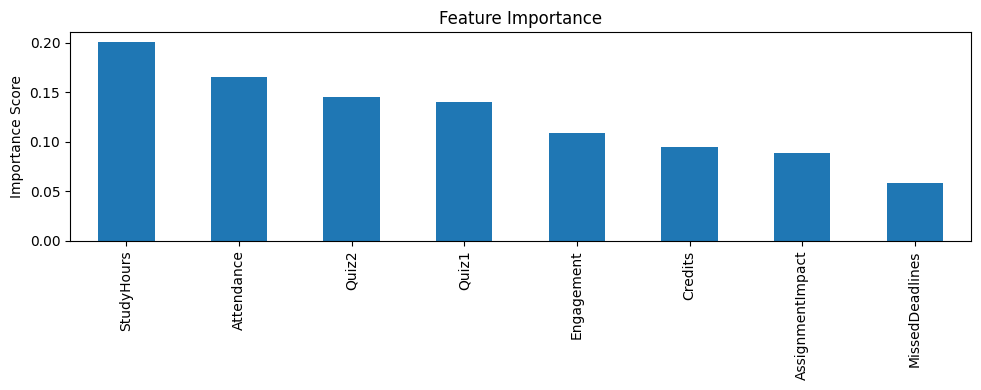

In [69]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define features and target
X = df.drop(columns=["FinalGradeEncoded"])  # only encoded grade remains
y = df["FinalGradeEncoded"]

# Step 2: Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Step 3: Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)

# Step 4: Plot
importances.sort_values(ascending=False).plot(
    kind="bar",
    figsize=(10, 4),
    title="Feature Importance"
)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


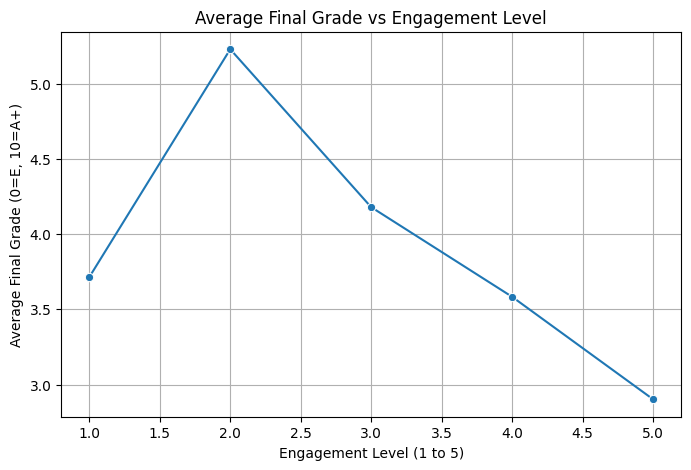

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Engagement and get mean grade
grouped = df.groupby("Engagement")["FinalGradeEncoded"].mean().reset_index()

# Line plot
plt.figure(figsize=(8, 5))
sns.lineplot(x="Engagement", y="FinalGradeEncoded", data=grouped, marker="o")
plt.title("Average Final Grade vs Engagement Level")
plt.xlabel("Engagement Level (1 to 5)")
plt.ylabel("Average Final Grade (0=E, 10=A+)")
plt.grid(True)
plt.show()


In [71]:
df.drop(columns=["Engagement"], inplace=True)
print(df.columns.tolist())


['Credits', 'StudyHours', 'AssignmentImpact', 'Quiz1', 'Quiz2', 'Attendance', 'MissedDeadlines', 'FinalGradeEncoded']


In [72]:
print("Available columns:", df.columns.tolist())


Available columns: ['Credits', 'StudyHours', 'AssignmentImpact', 'Quiz1', 'Quiz2', 'Attendance', 'MissedDeadlines', 'FinalGradeEncoded']


In [73]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop(columns=["FinalGradeEncoded"])
y = df["FinalGradeEncoded"]

# Split the data: 70% for training, 15% for validation, 15% for test (3-way split)
# First split: train vs temp (train 70%, temp 30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Second split: temp into validation and test (50%-50% of 30% => 15% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Print sizes
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 234
Validation set size: 50
Test set size: 51
